<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/Ecuaci%C3%B3n_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='salmon'> **Evelyn Tania Rojas Roa**

---


###<font color='darkorange'>**ECUACIÓN DE ONDA - MÉTODO EXPLÍCITO**

$$\frac{\partial^2 u}{\partial x^2} -4\frac{\partial^2 u}{\partial t^2} = 0$$
Sujeta a:
$$u(0,t)=0,u(1,t)=0, \;\;\; t>1$$

$$
u(x,0) = sen(\pi x), 0≤ x ≤ 1 \quad
$$

$$
\frac{\partial u}{\partial t} (x,0)=0
$$

Tomaremos los siguientes valores:
$$
\alpha = 4
$$
$$
h = 0.1
$$
$$
k = 0.05
$$



Solución exacta:

$$u(x,t)=\sin(\pi x)\,\cos(2\pi t)$$


Forma matricial del método:

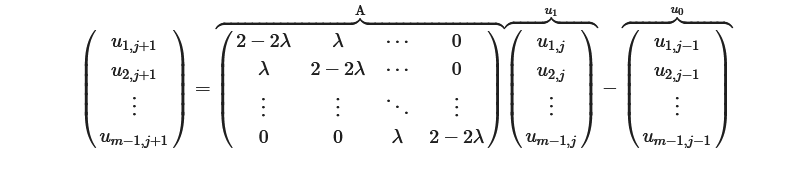

In [1]:
#Importamos las librerias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
from tabulate import tabulate #Función para hacer las tablas de manera más legible y bonita

In [2]:
#Definimos la función de la condición (varia dependiendo del ejercicio)
def f(x):
 return np.sin(np.pi*x)

In [4]:
def tridiagonal (n,a,b):
 return sp.Matrix([
 [a if i==j else b if abs (i-j)==1 else 0 for j in range (n)]
 for i in range (n)
 ]) #Función para generar la matriz tridiagonal que ocuparemos

In [5]:
r=1 #r= alpha(k^2)/h^2

In [6]:
A=tridiagonal(9,2-2*r,r)

In [ ]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [7]:
u0=sp.Matrix([f(0.1*(i+1)) for i in range(9)]) #Ponemos la condición donde x=0

In [8]:
u1=u0 #Igualamos a u0 debido a las condiciones del problema a resolver

In [9]:
def onda(A,u0, u1,j):
 #asegurar que u0 y u1 sean vectores columna
 u0=sp.Matrix(u0)
 u1=sp.Matrix(u1)
 S=[u0,u1]
 for n in range (2,j):
  sol=A*S[n-1]-S[n-2] #u^{n+1}
  S.append(sol) #Se van agregando a la lista
 #Regresar como una matriz donde cada fila es una solución
 return sp.Matrix([s.T for s in S])

In [10]:
j=50 #Número de pasos a dar

In [11]:
U=onda(A,u0,u1,j)

In [12]:
U_np=np.array(U.tolist(),dtype=float)

In [33]:
#Visualizamos las aproximaciones númericas en una tabla
data = [list(U.row(i)) for i in range(10)]
print(tabulate(data, tablefmt = "grid"))

+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.309017  |  0.587785 |  0.809017 |  0.951057 |  1        |  0.951057 |  0.809017 |  0.587785 |  0.309017  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.309017  |  0.587785 |  0.809017 |  0.951057 |  1        |  0.951057 |  0.809017 |  0.587785 |  0.309017  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.278768  |  0.530249 |  0.729825 |  0.85796  |  0.902113 |  0.85796  |  0.729825 |  0.530249 |  0.278768  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.221232  |  0.420808 |  0.579192 |  0.680881 |  0.715921 |  0.680881 |  0.579192 |  0.420808 |  0.221232  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------

**Ejercicio 2: Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.**

In [106]:
U_np[0] #Visualizamos la primer aproximación

array([0.30901699, 0.58778525, 0.80901699, 0.95105652, 1.        ,
       0.95105652, 0.80901699, 0.58778525, 0.30901699])

In [43]:
val=[0.309016,0.587785,0.809016,0.951056,1,0.951056,0.809016,0.587785,0.309016] #Ingresamos los valores de la tabla
u0_exact=np.array(val)

In [40]:
tabla = [(i*0.1, v) for i, v in enumerate(u0_exact)] #Generamos la tabla, se ulitza i*0.1 para obtener los xi correspondientes a cada iteración
print(tabulate(tabla, headers=["xi", "Valor"], tablefmt="github"))

|   xi |    Valor |
|------|----------|
|  0   | 0        |
|  0.1 | 0.309016 |
|  0.2 | 0.587785 |
|  0.3 | 0.809016 |
|  0.4 | 0.951056 |
|  0.5 | 1        |
|  0.6 | 0.951056 |
|  0.7 | 0.809016 |
|  0.8 | 0.587785 |
|  0.9 | 0.309016 |
|  1   | 0        |


Gráficamos los valores dados por la tabla y la primera aproximación obtenida

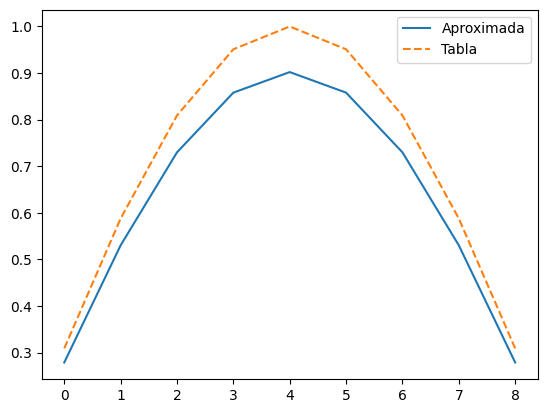

In [54]:
plt.plot(U_np[19], label='Aproximada')
plt.plot( u0_exact, '--', label='Tabla')
plt.legend()
plt.show()

In [56]:
#Error
arr1 = np.array(U_np[19])
arr2 = np.array(u0_exact)
error_abs = np.abs(arr1 - arr2)

In [60]:
#Tabulamos el error
tabla = [
    ( arr1[i], arr2[i], error_abs[i])
    for i in range(len(arr1))
]
print(tabulate(
    tabla,
    headers=["Aproximado", "Tabla", "error_abs"],
    tablefmt="github"
))

|   Aproximado |    Tabla |   error_abs |
|--------------|----------|-------------|
|     0.278768 | 0.309016 |   0.0302477 |
|     0.530249 | 0.587785 |   0.0575363 |
|     0.729825 | 0.809016 |   0.0791912 |
|     0.85796  | 0.951056 |   0.0930955 |
|     0.902113 | 1        |   0.097887  |
|     0.85796  | 0.951056 |   0.0930955 |
|     0.729825 | 0.809016 |   0.0791912 |
|     0.530249 | 0.587785 |   0.0575363 |
|     0.278768 | 0.309016 |   0.0302477 |


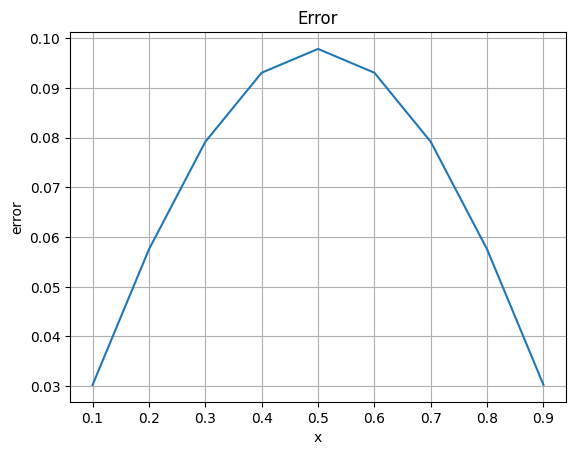

In [72]:
x_t = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) #Valores de x_i
plt.plot(x_t,error_abs)
plt.grid()
plt.xlabel("x")
plt.ylabel("error")
plt.title("Error")
plt.show()

**Ejercicio 3: Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.**

In [46]:
#Definimos la u de la solución exacta
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

In [90]:
#Ingresamos los valores de nuestro tamaño de paso y evaluamos en la función
h = 0.1
k = 0.05
x_vals = np.arange(0.1, 1, h)
t = k
u_vals = u_exact(x_vals, t)


In [91]:
#Tabulamos los valores de nuestra solución exacta
tabla = [( x_vals[i], u_vals[i]) for i in range(len(x_vals))]
print(tabulate(tabla,
               headers=[ "x", "u_exact(x,t)"],
               tablefmt="github"))

|   x |   u_exact(x,t) |
|-----|----------------|
| 0.1 |       0.293893 |
| 0.2 |       0.559017 |
| 0.3 |       0.769421 |
| 0.4 |       0.904508 |
| 0.5 |       0.951057 |
| 0.6 |       0.904508 |
| 0.7 |       0.769421 |
| 0.8 |       0.559017 |
| 0.9 |       0.293893 |


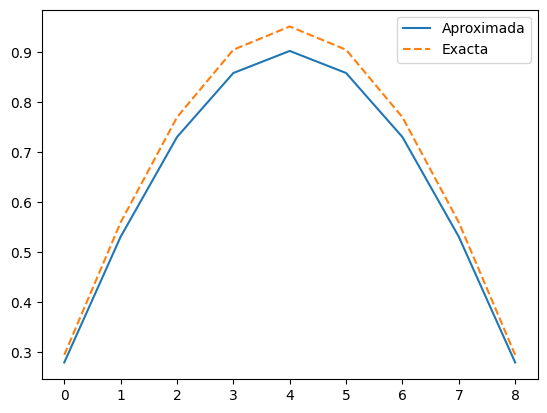

In [92]:
plt.plot(U_np[19], label='Aproximada')
plt.plot( u_vals, '--', label='Exacta')
plt.legend()
plt.show()

In [93]:
#Error
arr1 = np.array(U_np[19])
arr2 = np.array(u_vals)
error_abs = np.abs(arr1 - arr2)

In [94]:
#Tabulamos el error
tabla = [
    ( arr1[i], arr2[i], error_abs[i])
    for i in range(len(arr1))
]
print(tabulate(
    tabla,
    headers=["Aproximado", "Tabla", "error_abs"],
    tablefmt="github"
))

|   Aproximado |    Tabla |   error_abs |
|--------------|----------|-------------|
|     0.278768 | 0.293893 |   0.0151244 |
|     0.530249 | 0.559017 |   0.0287683 |
|     0.729825 | 0.769421 |   0.0395961 |
|     0.85796  | 0.904508 |   0.046548  |
|     0.902113 | 0.951057 |   0.0489435 |
|     0.85796  | 0.904508 |   0.046548  |
|     0.729825 | 0.769421 |   0.0395961 |
|     0.530249 | 0.559017 |   0.0287683 |
|     0.278768 | 0.293893 |   0.0151244 |


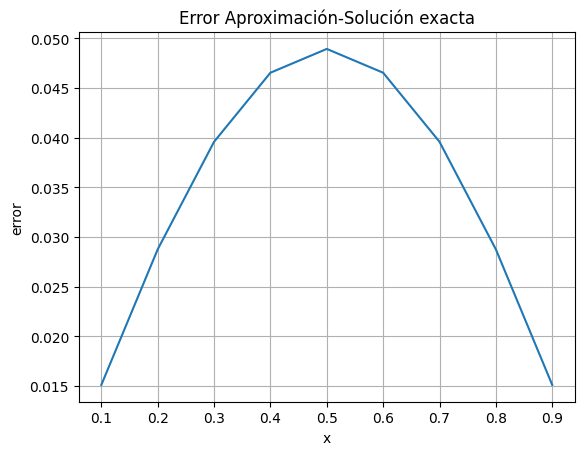

In [96]:
x_t = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) #Valores de x_i
plt.plot(x_t,error_abs)
plt.grid()
plt.xlabel("x")
plt.ylabel("error")
plt.title("Error Aproximación-Solución exacta")
plt.show()

**Ejercicio 1: Generar las gráficas 2D y 3D de la solución hasta t=0.50**

In [99]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

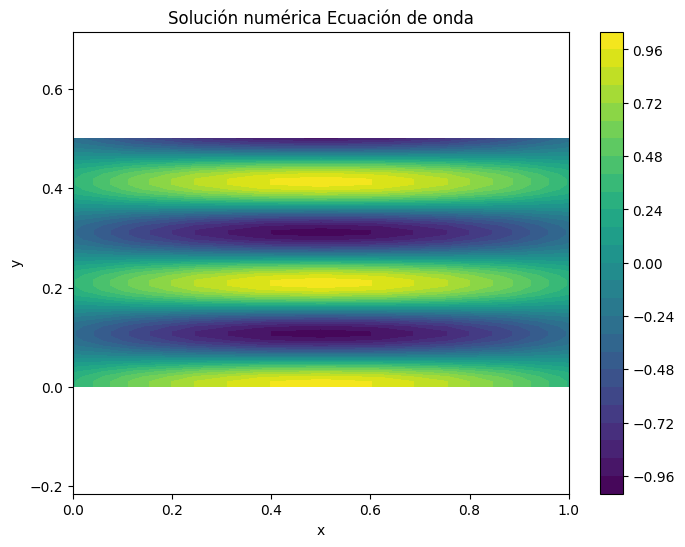

In [105]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica Ecuación de onda')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

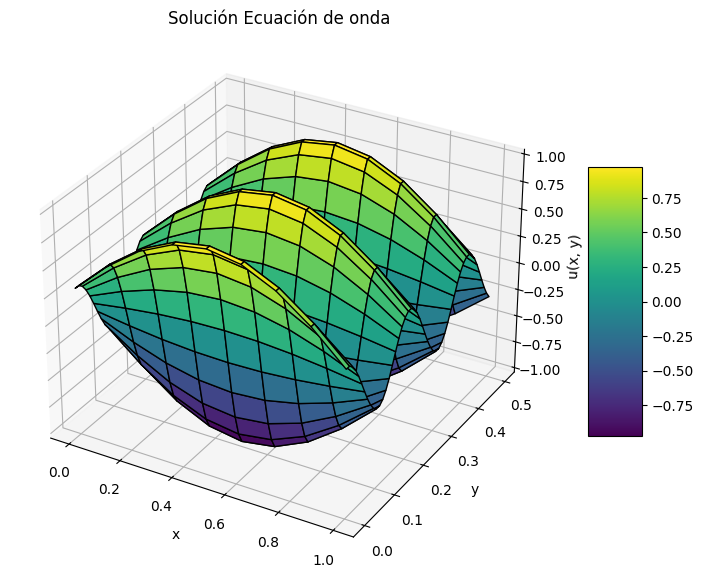

In [104]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución Ecuación de onda')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Ejercicio 4: Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.**

In [103]:
from matplotlib.animation import FuncAnimation #Crea animaciones cuadro por cuadro (frames), actualiza la gráfica automáticamente en cada paso del tiempo.
from IPython.display import HTML #Permite mostrar la animación dentro del notebook como HTML/JavaScript.
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

plt.close(fig)
HTML(anim.to_jshtml())